In [ ]:
require(scales)

In [3]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [1]:
setwd(paste(getwd(), "github/jupyter/", sep="/"))
getwd()

ERROR: Error in setwd(paste(getwd(), "github/jupyter/", sep = "/")): cannot change working directory


In [2]:
# Make a copy of /var/log/kern.log
# Delete all lines in the copy except for the process table
# Strip '[' and ']' characters
# Then load it:
t<-read.table('kern.log', header=T)

In [11]:
t$uniqueName <- paste(t$name,t$pid,sep="/")

In [45]:
tFiltered <- t %>% filter(total_vm > 100000) # Don't bother with rows for which VM size is insignificant
plot2<-ggplot(tFiltered, aes(x=reorder(uniqueName, total_vm),y=total_vm)) + 
    geom_bar(stat="identity") + 
    scale_y_continuous(labels=comma) + # to avoid scientific notation on the axis showing VM size
    coord_flip() + 
    labs(title="Process Virtual Memory Use", x="Process", y="total vm size (in 4kB pages)")

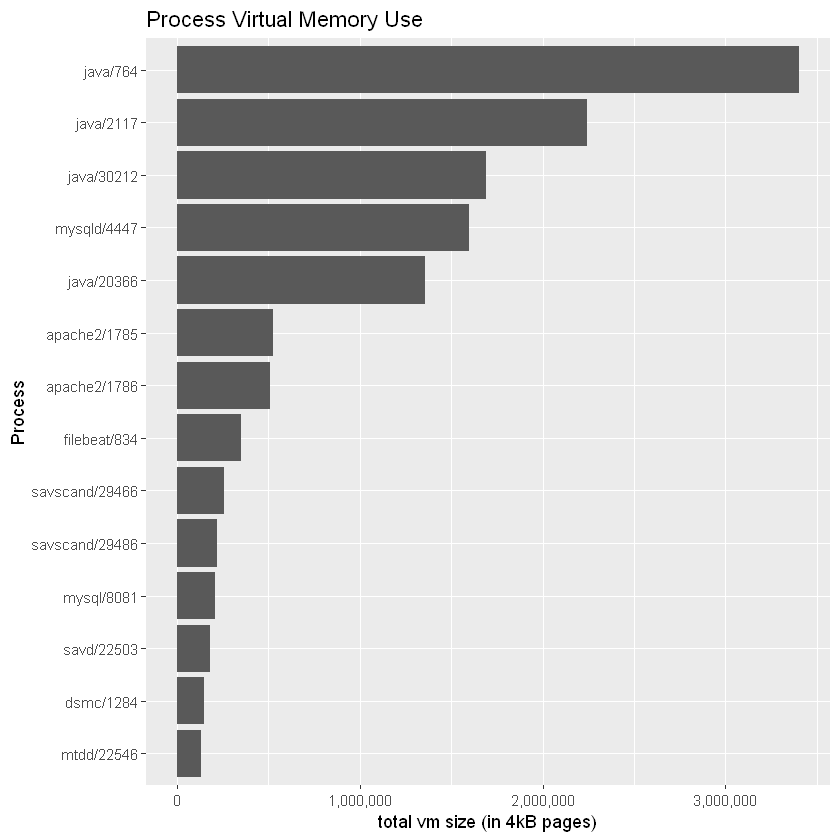

In [46]:
print(plot2)

In [47]:
ggsave("process_vm_size.png", plot=plot2)

Saving 6.67 x 6.67 in image
